# Cài đặt và import các thư viện

Cài đặt thư viện seaborn để trực quan hoá và datasets để lấy dữ liệu từ huggingface

In [ ]:
!pip install seaborn
!pip install datasets

Import thư viện cần thiết

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import requests
from datasets import load_dataset
import matplotlib.pyplot as plt
import warnings
from scipy import stats

In [3]:
warnings.filterwarnings("ignore")

# Dữ liệu

## Import dữ liệu

Lấy bộ dữ liệu banking-marketing của Huggingface

In [4]:
# Tải tập dữ liệu "Andyrasika/banking-marketing"
dataset = load_dataset("Andyrasika/banking-marketing")

# Lấy bộ dữ liệu train và test
df_train = pd.DataFrame(dataset['train'])
df_test = pd.DataFrame(dataset['test'])

# Trực quan bộ dữ liệu
df_train

Extracting data files:   0%|          | 0/2 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/45211 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/4521 [00:00<?, ? examples/s]

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,technician,married,tertiary,no,825,no,no,cellular,17,nov,977,3,-1,0,unknown,yes
45207,71,retired,divorced,primary,no,1729,no,no,cellular,17,nov,456,2,-1,0,unknown,yes
45208,72,retired,married,secondary,no,5715,no,no,cellular,17,nov,1127,5,184,3,success,yes
45209,57,blue-collar,married,secondary,no,668,no,no,telephone,17,nov,508,4,-1,0,unknown,no


## Mô tả dữ liệu

Theo như mô tả được ghi trên trang chủ của bộ dữ liệu thì bộ dữ liệu có liên quan đến các chiến dịch tiếp thị trực tiếp (cuộc gọi điện thoại) của một tổ chức ngân hàng Bồ Đào Nha. **Mục tiêu phân loại là dự đoán xem khách hàng có đăng ký tiền gửi có kỳ hạn hay không (biến y)**. </br>
Vì vậy, chúng ta sẽ tập trung phân tích dựa trên biến target là biến y.

Các thuộc tính được định nghĩa ở trang chủ hugggingface của bộ dữ liệu này là: </br>
* 1 - age (numeric) </br>
* 2 - job : type of job (categorical: "admin.","unknown","unemployed","management","housemaid","entrepreneur","student", "blue-collar","self-employed","retired","technician","services")</br>
* 3 - marital : marital status (categorical: "married","divorced","single"; note: "divorced" means divorced or widowed)</br>
* 4 - education (categorical: "unknown","secondary","primary","tertiary")</br>
* 5 - default: has credit in default? (binary: "yes","no")</br>
* 6 - balance: average yearly balance, in euros (numeric)</br>
* 7 - housing: has housing loan? (binary: "yes","no")</br>
* 8 - loan: has personal loan? (binary: "yes","no")</br>
related with the last contact of the current campaign:
* 9 - contact: contact communication type (categorical: "unknown","telephone","cellular")</br>
* 10 - day: last contact day of the month (numeric)</br>
* 11 - month: last contact month of year (categorical: "jan", "feb", "mar", …, "nov", "dec")</br>
* 12 - duration: last contact duration, in seconds (numeric)
other attributes:</br>
* 13 - campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)</br>
* 14 - pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric, -1 means client was not previously contacted)</br>
* 15 - previous: number of contacts performed before this campaign and for this client (numeric)</br>
* 16 - poutcome: outcome of the previous marketing campaign (categorical: "unknown","other","failure","success")</br>
Output variable (desired target):</br>

* 17 - y - has the client subscribed a term deposit? (binary: "yes","no")</br>

Với độ dài của tập train là:

In [5]:
len(df_train)

45211

Và độ dài của tập test là:

In [6]:
len(df_test)

4521

## Khám phá dữ liệu

In [11]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


Như trên thì ta có thể thấy rằng dữ liệu hoàn toàn đầy đủ (tất cả các thuộc tính đều là non-null). </br>
Trong đó có các thuộc tính là age, balance, day, duration, campaign, pdays, previous là các biến có dạng int64. Còn lại là định dạng object (cụ thể là string).

Khi so sánh với mô tả thì có thể chia ra thành 2 loại biến đó là các biến numeric và các biến categorical (phân loại). Tuy nhiên, trên thực tế thì biến day đáng lẽ phải thuộc biến categorical, vì phạm vi xuất hiện của biến day chỉ nằm trong khoảng [1,31] và là số nguyên có hạn về số lượng. Với:</br>
* Các biến numeric: age, duration, campaign, pdays, previous.
* Các biến categorical: job, marital, education, default, housing, loan, contact, day, month, poutcome, y



In [81]:
list_numeric = ["age", "duration", "campaign", "pdays", "previous"]
list_categorical = ["job", "marital", "education", "day", "default", "housing", "loan", "contact", "month", "poutcome", "y"]

### Numeric

In [10]:
def cal_mean(x):
  #Hàm tính trung bình
  return sum(x)/len(x)

def quantile(x):
  #Hàm tính tứ phân vị
  x = sorted(x)

  #Q1
  temp = len(x) / 4
  if type(temp) != int:
    q1 = x[round(len(x)/4)]
  else:
    q1 = cal_mean([x[temp], x[temp + 1]])
  #Q2
  temp = len(x) / 2
  if type(temp) != int:
    q2 = x[round(len(x)/2)]
  else:
    q2 = cal_mean([x[temp], x[temp + 1]])
  #Q3
  temp = len(x) * (3/4)
  if type(temp) != int:
    q3 = x[round(len(x)*(3/4))]
  else:
    q3 = cal_mean([x[temp], x[temp + 1]])
  return [round(q1, 6), round(q2,6), round(q3,6)]

def standard_deviation(data, mean_value):
    #Hàm tính độ lệch chuẩn
    variance = sum((x - mean_value) ** 2 for x in data) / len(data)
    return variance ** 0.5

def skewness(data):
  #Hàm tính giá trị skewness
  n = len(data)
  mean_value = cal_mean(data)
  stdev = standard_deviation(data, mean_value)

  skewness_value = (sum((x - mean_value) ** 3 for x in data) / n) / (stdev ** 3)

  return skewness_value

def kurtosis(data):
  #Hàm tính giá trị kurtosis
  n = len(data)
  mean_value = cal_mean(data)
  stdev = standard_deviation(data, mean_value)

  kurtosis_value = (sum((x - mean_value) ** 4 for x in data) / n) / (stdev ** 4) - 3

  return kurtosis_value

def cal_statistic_values_numeric(x):
  #Hàm tổng hợp các giá trị thống kê [mean, std, quantile, min, max, range, iqr, skewness, kurtosis]
  mean = cal_mean(x)
  std = standard_deviation(x, mean)
  quantile_x = quantile(x)
  min_x = min(x)
  max_x = max(x)
  range = max_x - min_x
  iqr = quantile_x[2] - quantile_x[0]
  skew = skewness(x)
  kurt = kurtosis(x)

  return [round(mean, 6), round(std, 6), round(min_x, 6), quantile_x[0], quantile_x[1], quantile_x[2], max_x, range, iqr, round(skew, 6), round(kurt,6)]

Tổng hợp dữ liệu thống kê cho toàn bộ các biến numeric

In [84]:
numeric_report = []
for i in range(len(list_numeric)):
  numeric_report.append(cal_statistic_values_numeric(df_train[list_numeric[i]]))

numeric_report = np.array(numeric_report).T

# Chuyển đổi thành DataFrame
df_numeric_report = pd.DataFrame(numeric_report)
numeric_report = np.array(numeric_report).T

df_numeric_report.columns = list_numeric
df_numeric_report.index = ["mean", "standard deviation", "min", "25%", "50%", "75%", "max", "range", "IQR", "skewness", "kurtosis"]
df_numeric_report

,age,duration,campaign,pdays,previous
mean,40.936210,258.163080,2.763841,40.197828,0.580323
standard deviation,10.618645,257.524964,3.097987,100.127639,2.303416
min,18.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,4918.000000,63.000000,871.000000,275.000000
range,77.000000,4918.000000,62.000000,872.000000,275.000000
IQR,15.000000,216.000000,2.000000,0.000000,0.000000
skewness,0.684795,3.144214,4.898488,2.615629,41.845066


Dựa vào các thông số trong bảng mô tả thống kê, chúng ta có thể đưa ra một số nhận xét về dữ liệu:

1. **Tuổi (Age):**
   - Trung bình tuổi của các cá nhân trong dữ liệu là khoảng 40.94 tuổi, với độ lệch chuẩn là khoảng 10.62 tuổi.
   - Tuổi nhỏ nhất là 18 tuổi, tuổi lớn nhất là 95 tuổi.
   - Phần lớn các cá nhân (25-75%) có độ tuổi từ 33 đến 48 tuổi.
   - Dữ liệu có độ chệch nhỏ về phía phải (skewness dương), có nghĩa là có một số lượng lớn hơn các cá nhân có tuổi nhỏ hơn so với trung bình.

2. **Thời lượng cuộc gọi (Duration):**
   - Trung bình thời lượng cuộc gọi là khoảng 258.16 giây (hơn 4 phút), với độ lệch chuẩn là khoảng 257.52 giây.
   - Thời lượng cuộc gọi ngắn nhất là 0 giây, còn thời lượng lâu nhất là 4918 giây (gần 1.4 giờ).
   - Phần lớn các cuộc gọi (25-75%) có thời lượng từ 103 đến 319 giây.
   - Dữ liệu về thời lượng cuộc gọi có độ chệch lớn (skewness dương), có nghĩa là có một số lượng lớn hơn các cuộc gọi có thời lượng ngắn hơn so với trung bình.

3. **Số lần tiếp cận trong chiến dịch (Campaign):**
   - Trung bình số lần tiếp cận trong chiến dịch là khoảng 2.76 lần, với độ lệch chuẩn là khoảng 3.10 lần.
   - Số lần tiếp cận ít nhất là 1 lần, nhiều nhất là 63 lần.
   - Phần lớn các cá nhân (25-75%) được tiếp cận từ 1 đến 3 lần.
   - Dữ liệu về số lần tiếp cận có độ chệch lớn (skewness dương), có nghĩa là có một số lượng lớn hơn các cá nhân được tiếp cận ít lần so với trung bình.

4. **Pdays (Số ngày từ lần liên lạc trước đó):**
   - Trung bình số ngày từ lần liên lạc trước đó là khoảng 40.20 ngày, với độ lệch chuẩn là khoảng 100.13 ngày.
   - Số ngày ít nhất là -1 ngày (có thể là giá trị thay thế cho việc không có liên lạc trước đó), nhiều nhất là 871 ngày.
   - Phần lớn các cá nhân (25-75%) có số ngày từ -1 đến -1 (tức là có nhiều cá nhân không có liên lạc trước đó).
   - Dữ liệu có độ chệch lớn (skewness dương), có nghĩa là có một số lượng lớn hơn các cá nhân có số ngày ít hơn so với trung bình.

5. **Previous (Số lần liên lạc trước đó):**
   - Trung bình số lần liên lạc trước đó là khoảng 0.58 lần, với độ lệch chuẩn là khoảng 2.30 lần.
   - Số lần liên lạc ít nhất là 0, nhiều nhất là 275 lần.
   - Phần lớn các cá nhân (25-75%) có số lần liên lạc từ 0 đến 0 (tức là có nhiều cá nhân không có liên lạc trước đó).
   - Dữ liệu có độ chệch lớn (skewness dương), có nghĩa là có một số lượng lớn hơn các cá nhân có số lần liên lạc ít hơn so với trung bình.

6. **Nhận xét về phạm vi (Range):**
   - Phạm vi của dữ liệu cung cấp thông tin về sự biến động của các biến. Ví dụ, biến "age" có phạm vi là 77, có nghĩa là có sự đa dạng lớn về độ tuổi trong dữ liệu.

7. **Nhận xét về độ lệch (Skewness) và độ nghiêng (Kurtosis):**
   - Độ lệch và độ nghiêng cung cấp thông tin về hình dạng

 của phân phối dữ liệu. Một số biến có độ lệch và độ nghiêng lớn, cho thấy phân phối của chúng không tuân theo phân phối chuẩn. Điều này có thể làm ảnh hưởng đến việc sử dụng một số mô hình thống kê yêu cầu giả định về phân phối dữ liệu.

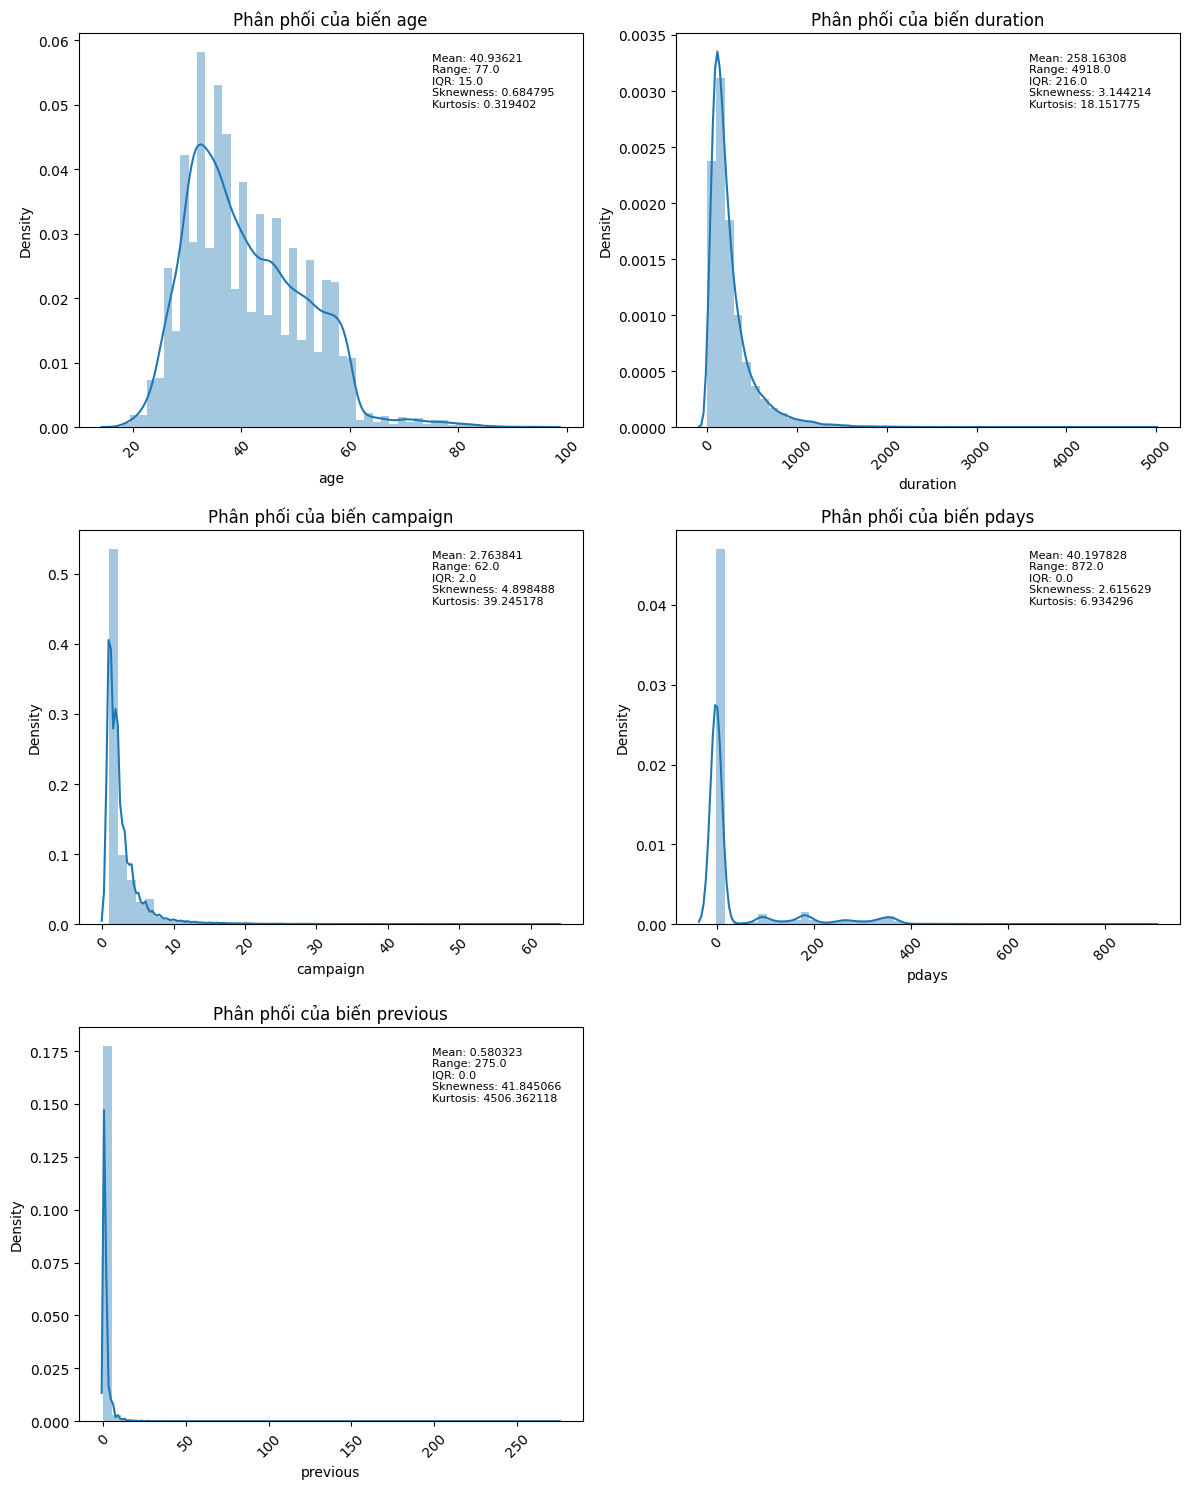

In [95]:
# Tạo figure và subplot
fig = plt.figure(figsize=(12, 15))

for i in range(len(list_numeric)):
  # Tạo DataFrame từ danh sách
  ax = fig.add_subplot(3, 2, i+1)
  # Vẽ barplot
  ax = sns.distplot(df_train[list_numeric[i]])
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_title('Phân phối của biến {}'.format(list_numeric[i]))
  ax.text(0.7, 0.95, "Mean: {}\nRange: {}\nIQR: {}\nSknewness: {}\nKurtosis: {}".format(numeric_report[i][0], numeric_report[i][7], numeric_report[i][8],
                                                                                         numeric_report[i][9], numeric_report[i][10]),
                                                                                         ha="left", va="top", transform=ax.transAxes, fontsize=8, color="black")

# Hiển thị biểu đồ
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/project/distribution_numeric.png")
plt.show()

### Categorical

In [16]:
# Đổi biến day sang string để trở thành biến categorical
df_train["day"] = df_train["day"].astype('string')

In [17]:
def cal_freq(x, list_x):
  #Hàm tính tần suất
  count = 0
  for j in range(len(list_x)):
    if list_x[j] == x:
      count+=1
  return count

def cal_statistic_values_categorical(x):
  # Hàm tổng hợp các giá trị thống kê của biến categorical [số lượng item, item xuất hiện nhiều nhất, tần suất của item đó, list tổng hợp tần suất của các item]
  num_unique = len(set(x))
  list_freq = []
  top_freq = [0,0]
  for j in set(x):
    item = [j, cal_freq(j, x)]
    list_freq.append(item)
    if top_freq[1] <= item[1]:
      top_freq = item
  return [num_unique, top_freq[0], top_freq[1], list_freq]

Tổng hợp dữ liệu thống kê cho toàn bộ các biến Categorical

In [85]:
categorical_report = []
for i in range(len(list_categorical)):
  categorical_report.append(cal_statistic_values_categorical(df_train[list_categorical[i]]))

categorical_report = np.array(categorical_report).T

# Biến đổi thành DataFrame
df_categorical_report = pd.DataFrame(categorical_report[[0,1,2]])
categorical_report = categorical_report.T

df_categorical_report.columns = list_categorical
df_categorical_report.index = ["number of unique item", "top item", "top item's frequency"]
df_categorical_report

,job,marital,education,day,default,housing,loan,contact,month,poutcome,y
number of unique item,12,3,4,31,2,2,2,3,12,4,2
top item,blue-collar,married,secondary,20,no,yes,no,cellular,may,unknown,no
top item's frequency,9732,27214,23202,2752,44396,25130,37967,29285,13766,36959,39922


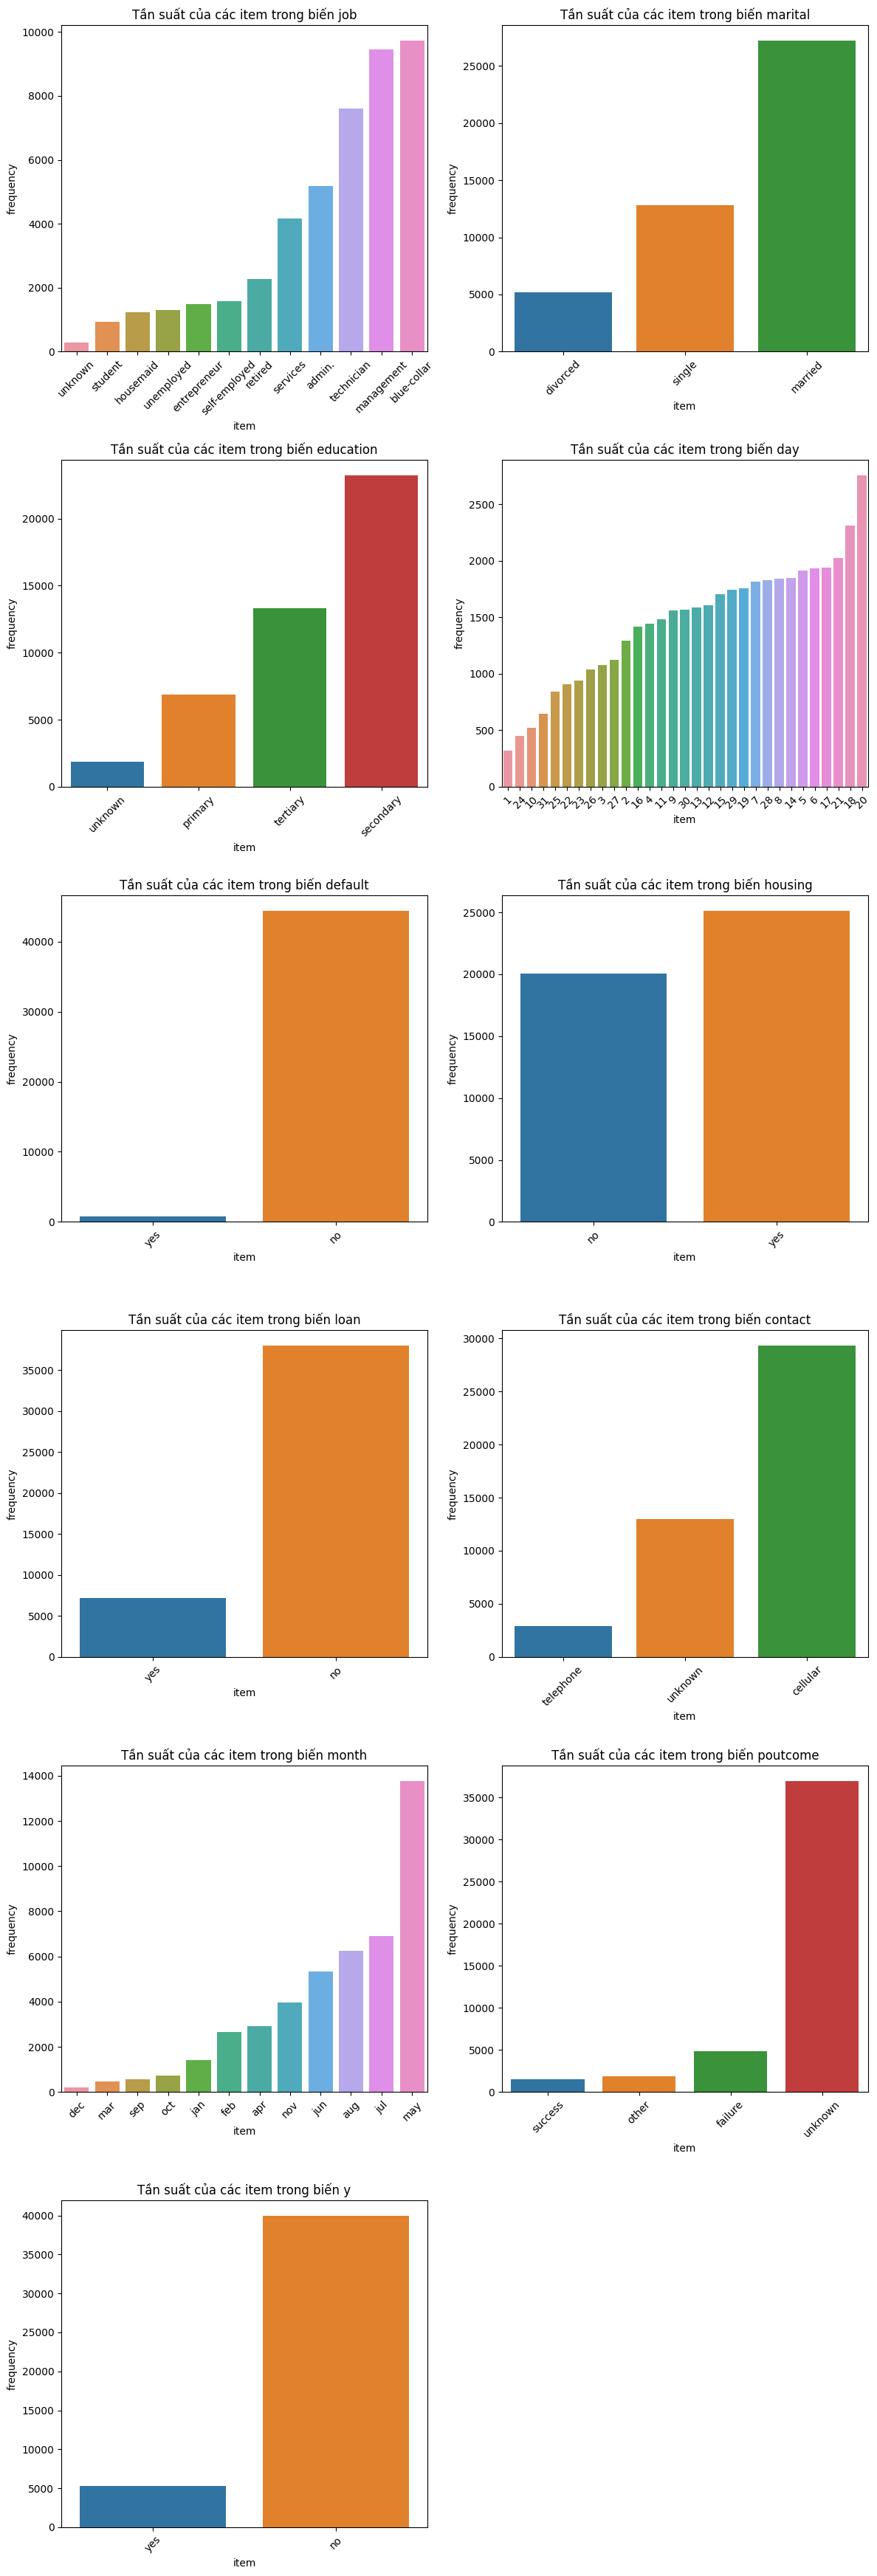

In [96]:
# Tạo figure và subplot
fig = plt.figure(figsize=(12, 35))

for i in range(len(list_categorical)):
  # Tạo DataFrame từ danh sách
  data = pd.DataFrame(categorical_report[i][3], columns=['item', 'frequency'])
  ax = fig.add_subplot(6, 2, i+1)
  # Vẽ barplot
  ax = sns.barplot(x='item', y='frequency', data=data.sort_values(by='frequency'))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_title('Tần suất của các item trong biến {}'.format(list_categorical[i]))

# Hiển thị biểu đồ
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/project/barplot_categorical.png")
plt.show()

Ở biến target y, ta có thể thấy rằng sự chênh lệch giữa class yes và no là rất lớn. Vì vậy, bộ dữ liệu này là một bộ dữ liệu bị mất cân bằng nhãn.

## Phân tích với biến Target y

### Numeric

Với biến target là một biến phân lớp nhị phân, thì việc phân tích mối liên hệ giữa biến target và biến thuộc tính không thể tính độ tương đồng được. Bởi vì hệ số tương quan Pearson chỉ đo lường mối quan hệ tuyến tính và có thể không phản ánh đầy đủ về mối quan hệ giữa biến numeric và biến target, đặc biệt là trong trường hợp các mối quan hệ không tuyến tính. </br>
Vì vậy, thay vì tính độ tương quan giữa các biến numeric và biến target thì ta sẽ thực hiện t-test để kiểm tra sự khác biệt giữa giá trị trung bình của hai nhóm hoặc nhiều nhóm (biến y) trong dữ liệu. Phương pháp này thường được áp dụng khi muốn biết liệu có sự khác biệt có ý nghĩa thống kê giữa các nhóm hay không.

In [51]:
def remove_outlier(df, x):
  # Hàm loại bỏ các outlier nằm ngoài vùng IQR
  quantile_x = quantile(df[x])
  df = df[df[x] >= quantile_x[0]]
  df = df[df[x] <= quantile_x[2]]
  return df

from scipy import stats

def t_test_numeric_binary(data, x, target):
    # Hàm thực hiện t-test cho biến numeric
    # Chia dữ liệu thành hai nhóm dựa trên giá trị của biến phân loại nhị phân
    group1 = data[data[target] == "no"][x]
    group2 = data[data[target] == "yes"][x]

    # Thực hiện t-test độc lập giữa hai nhóm
    statistic, p_value = stats.ttest_ind(group1, group2)

    return [statistic, p_value]

Thực hiện t-test cho toàn bộ các biến numeric

In [21]:
list_ttest_numeric = []
for i in range(len(list_numeric)):
  list_ttest_numeric.append(t_test_numeric_binary(remove_outlier(df_train, list_numeric[i]), list_numeric[i], "y"))

list_ttest_numeric = np.array(list_ttest_numeric).T
df_ttest_numeric = pd.DataFrame(list_ttest_numeric)
df_ttest_numeric.columns = list_numeric
df_ttest_numeric.index = ["t-statistic", "p-value"]
df_ttest_numeric

,age,duration,campaign,pdays,previous
t-statistic,3.097437,-1.943355e+01,8.562306e+00,NaN,NaN
p-value,0.001954,1.909339e-83,1.150035e-17,NaN,NaN


Như phân tích trên thì ta có thể thấy rằng các biến numeric có giá trị p-value rất nhỏ (gần 0) cho thấy có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm đối với tất cả các biến. </br>
Tuy nhiên ở biến pdays và previous không tính được p-value và t-statistic, vì phương sai của 2 nhóm của biến target y ở 2 biến thuộc tính này là 0. Nên việc tính toán ra p-value là điều không thể.

Vì vậy, ta chuyển sang phân tích Mann-Whitney U Test, được sử dụng để kiểm tra sự khác biệt giữa hai nhóm độc lập và không phụ thuộc vào phân phối chuẩn.

In [22]:
from scipy.stats import mannwhitneyu

def mann_whitney_u_test(data, x, target):
    group1 = data[data[target] == "no"][x]
    group2 = data[data[target] == "yes"][x]

    # Thực hiện Mann-Whitney U Test
    u_statistic, p_value = mannwhitneyu(group1, group2, alternative='two-sided')

    return u_statistic, p_value

Thực hiện t-test cho toàn bộ biến numeric

In [24]:
list_ttest_numeric = []
for i in range(len(list_numeric)):
  list_ttest_numeric.append(mann_whitney_u_test(remove_outlier(df_train, list_numeric[i]), list_numeric[i], "y"))

list_ttest_numeric = np.array(list_ttest_numeric).T
df_ttest_numeric = pd.DataFrame(list_ttest_numeric)
df_ttest_numeric.columns = list_numeric
df_ttest_numeric.index = ["u-statistic", "p-value"]
df_ttest_numeric

,age,duration,campaign,pdays,previous
u-statistic,2.401715e+07,1.406970e+07,7.634214e+07,56800440.0,56800440.0
p-value,1.377054e-03,4.932375e-84,1.081864e-19,1.0,1.0


Dựa vào kết quả của Mann-Whitney U Test cho từng biến, chúng ta có thể nhận xét như sau:

1. **Biến "age":**
   - Nhận xét: P-value rất nhỏ, cho thấy có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm đối với "age".

2. **Biến "duration":**
   - Nhận xét: P-value rất nhỏ, cho thấy có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm đối với "duration".

3. **Biến "campaign":**
   - Nhận xét: P-value rất nhỏ, cho thấy có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm đối với "campaign".

4. **Biến "pdays":**
   - Nhận xét: P-value lớn hơn mức ý nghĩa thông thường 0.05, cho thấy không có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm đối với "pdays".

5. **Biến "previous":**
   - Nhận xét: lớn hơn mức ý nghĩa thông thường 0.05, cho thấy không có đủ bằng chứng để bác bỏ giả thuyết không có sự khác biệt giữa các nhóm đối với "previous".

Nhìn chung, Mann-Whitney U Test cho thấy có sự khác biệt đáng kể về giá trị trung bình giữa các nhóm đối với các biến "age", "duration", "campaign", trong khi "pdays" và "previous" không thể kết luận có sự khác biệt đáng kể. </br>
Vì vậy, nhóm các biến numeric được chọn ra để huấn luyện mô hình là ["age", "duration", "campaign"]

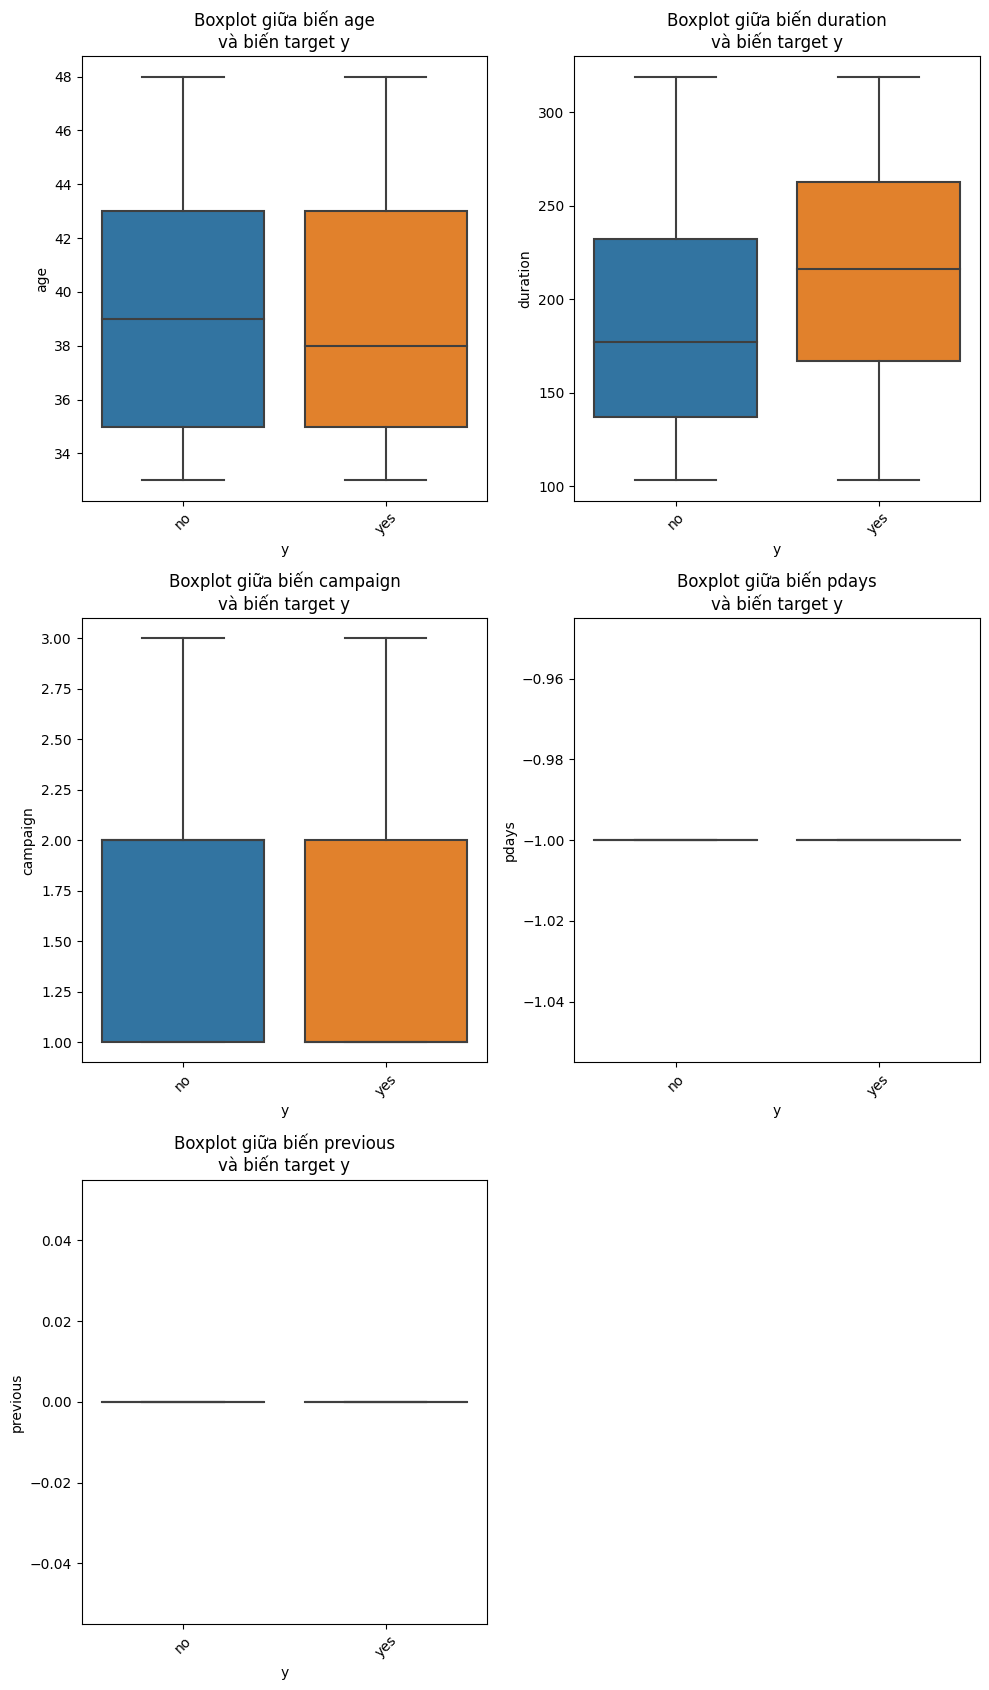

In [97]:
# Tạo figure và subplot
fig = plt.figure(figsize=(10, 17))

for i in range(len(list_numeric)):
  ax = fig.add_subplot(3, 2, i+1)
  # Vẽ barplot
  ax = sns.boxplot(x='y', y=list_numeric[i], data=remove_outlier(df_train, list_numeric[i]))
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_title('Boxplot giữa biến {}\nvà biến target y'.format(list_numeric[i]))

# Hiển thị biểu đồ
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/project/boxplot_numeric.png")
plt.show()

### Categorical

Cũng giống như các biến numeric, chúng ta không thể áp dụng hệ số tương quan Pearson giữa các biến categorical. Thay vào đó thì ta sẽ thực hiện phân tích Chi-squared. </br>
X^2 (chi-squared) là một phương pháp thống kê được sử dụng để kiểm tra sự tương quan giữa các biến phân loại (categorical variables) trong một bảng tần suất. Phương pháp này thường được sử dụng để kiểm tra xem có sự tương quan giữa các biến phân loại hay không, hay nói cách khác, xem liệu phân phối của các biến đó có khác nhau đáng kể không.

In [25]:
from scipy.stats import chi2_contingency

def cal_chi2(df, x, target):
  # Hàm thực hiện Chi-squared test cho biến categorical
  contingency_table = pd.crosstab(df[x], df[target])
  chi2, p_value, _, _ = chi2_contingency(contingency_table)
  return [chi2, p_value]

Thực hiện Chi-squared cho toàn bộ biến categorical

In [26]:
list_chi2test_categorical = []
for i in range(len(list_categorical)):
  list_chi2test_categorical.append(cal_chi2(df_train, list_categorical[i], 'y'))

list_chi2test_categorical = np.array(list_chi2test_categorical).T
df_chi2test_categorical = pd.DataFrame(list_chi2test_categorical)
df_chi2test_categorical.columns = list_categorical
df_chi2test_categorical.index = ["chi2", "p-value"]
df_chi2test_categorical

,job,marital,education,day,default,housing,loan,contact,month,poutcome,y
chi2,8.361055e+02,1.964959e+02,2.389235e+02,5.740506e+02,22.202250,8.748224e+02,2.096170e+02,1.035714e+03,3061.838938,4391.506589,45201.319916
p-value,3.337122e-172,2.145100e-43,1.626656e-51,6.896005e-102,0.000002,2.918798e-192,1.665061e-47,1.251738e-225,0.000000,0.000000,0.000000


Tất cả các giá trị p-value đều rất nhỏ, cho thấy có đủ bằng chứng để bác bỏ giả thuyết không có sự liên quan. Điều này đồng nghĩa với việc các biến đã được kiểm tra có ảnh hưởng đáng kể đến biến mục tiêu.</br>
Vì vậy, toàn bộ các biến categorical được chọn ra để huấn luyện mô hình.

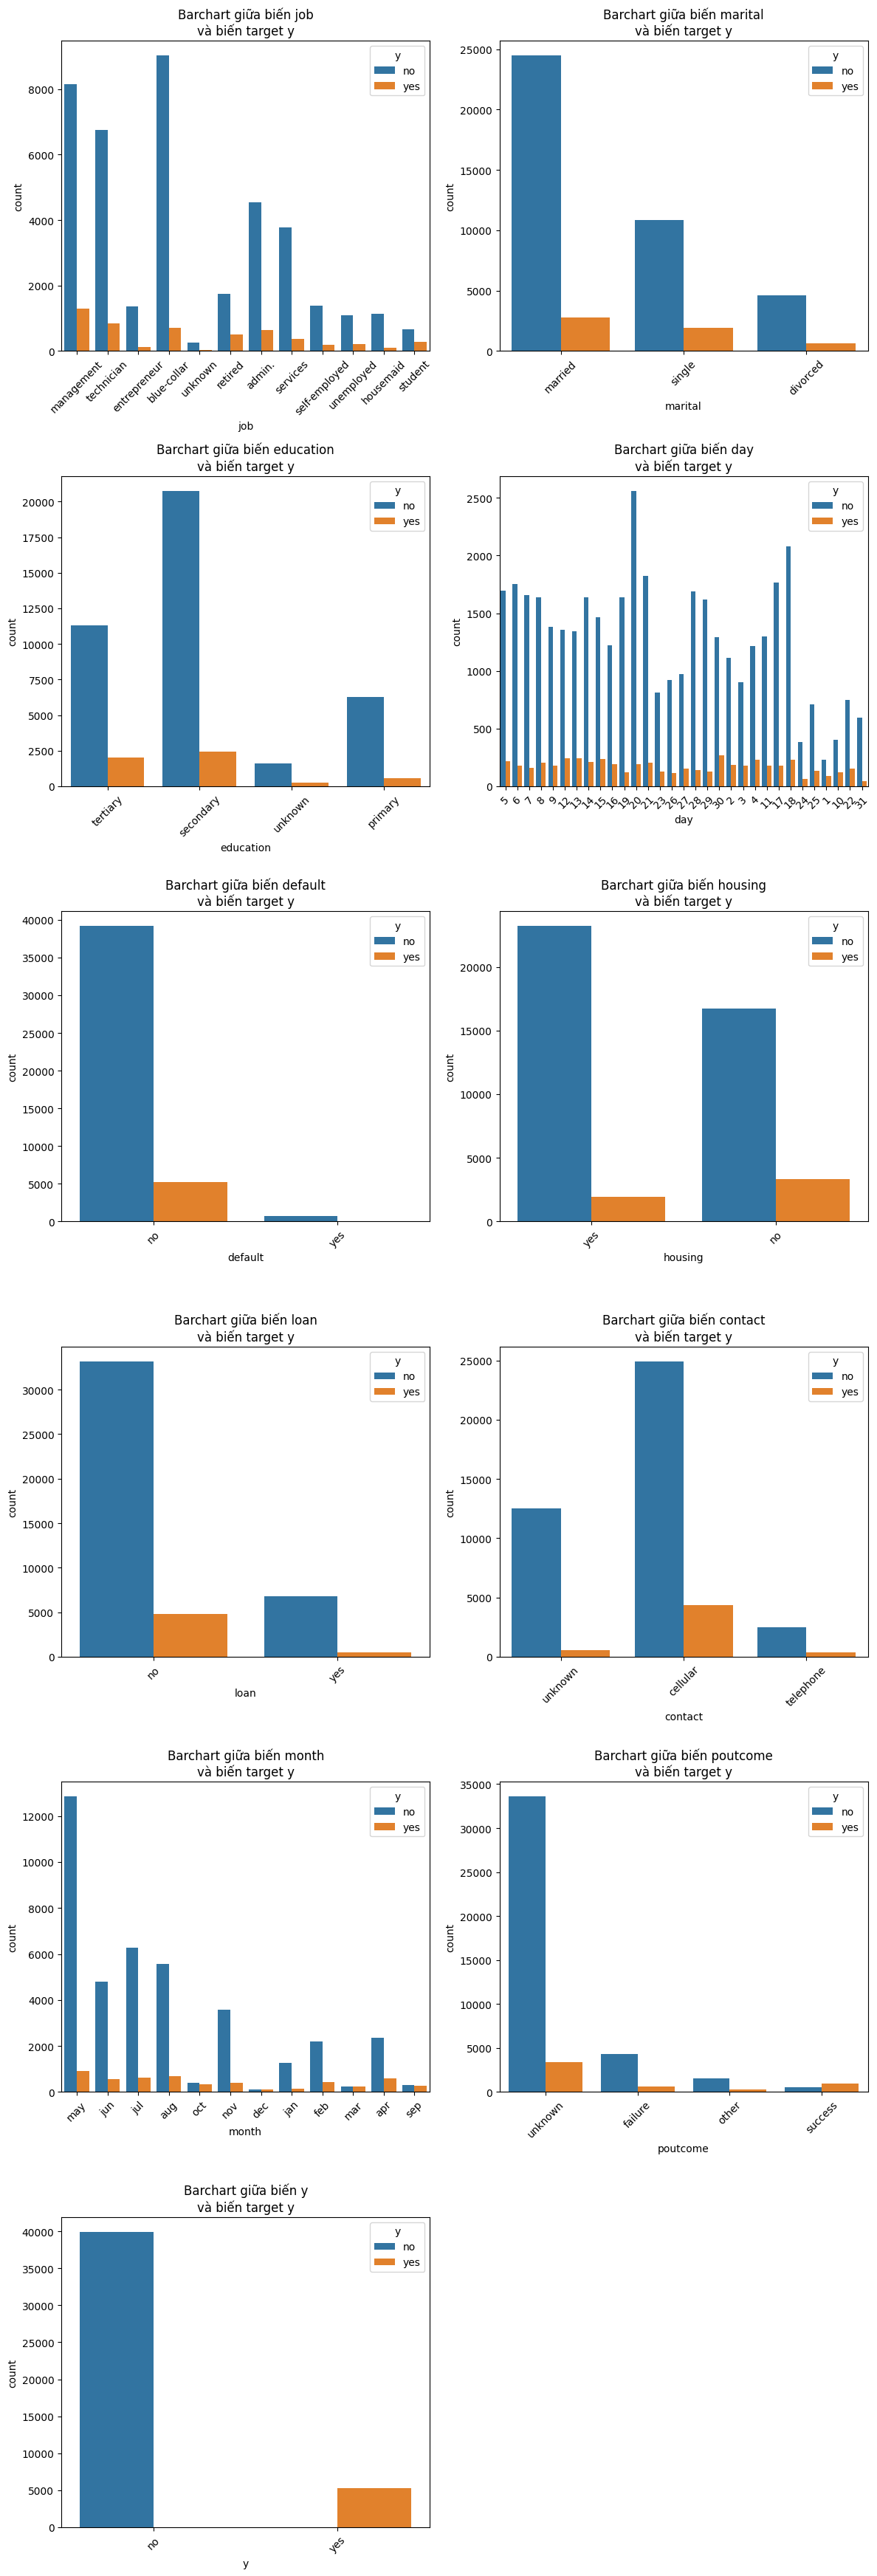

In [98]:
# Tạo figure và subplot
fig = plt.figure(figsize=(12, 35))

for i in range(len(list_categorical)):
  ax = fig.add_subplot(6, 2, i+1)
  # Vẽ barplot
  ax = sns.countplot(x = list_categorical[i], hue = "y", data = df_train, dodge = True)
  ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
  ax.set_title('Barchart giữa biến {}\nvà biến target y'.format(list_categorical[i]))

# Hiển thị biểu đồ
plt.tight_layout()
# plt.savefig("/content/drive/MyDrive/project/barchat_categorical.png")
plt.show()

# Mô hình

## Tiền xử lí dữ liệu

Tạo các list mới lưu trữ các thuộc tính đã được chọn

In [38]:
list_numeric_chosen = ["age", "duration", "campaign"]

#Loại bỏ biến target
list_categorical.remove("y")
list_categorical_chosen = list_categorical

In [39]:
import copy
# Sao chép bản sao của dữ liệu train và test để tiện cho quá trình thực hiện
train_df = copy.deepcopy(df_train)
test_df = copy.deepcopy(df_test)

### Encode dữ liệu

Bởi vì với các mô hình học máy, hay bất cứ các loại mô hình học sâu (DL), AI nào thì việc mã hoá dữ liệu (encode) là một bước quan trọng trong tiền xử lí dữ liệu. Vì:
1. **Yêu cầu đầu vào của mô hình:**
   - Mô hình học máy thường yêu cầu đầu vào là dữ liệu dạng số (numeric). Các thuật toán thường không thể xử lý trực tiếp dữ liệu ở dạng văn bản, chuỗi ký tự, hoặc các biến phân loại.

2. **Xử lý biến phân loại:**
   - Các biến phân loại thường cần được chuyển đổi thành dạng số để có thể sử dụng trong mô hình. Mã hóa như One-Hot Encoding hoặc Label Encoding giúp biến đổi các biến phân loại thành dạng số.
   
3. **Chuyển đổi biến liên tục thành biến phân loại (discretization):**
   - Đôi khi, việc chuyển đổi biến liên tục thành các khoảng giá trị có thể giúp mô hình học được mối quan hệ phức tạp hơn.

Tóm lại, mã hóa dữ liệu là một phần quan trọng của quá trình chuẩn bị dữ liệu trước khi đưa vào mô hình học máy, giúp đảm bảo rằng dữ liệu là hợp lý và có thể được hiểu và xử lý bởi các thuật toán học máy.

Chúng ta sẽ tiến hành one-hot encoding các biến categorical. Với biến target thì chỉ cần encode 2 class của nó thành [0,1].

In [40]:
# Biến đổi các cột categorical thành dummies
# Dummies ở đây sẽ tách từng cột categorical thành các biến con là các class trong nó, với giá trị của từng biến con sẽ là [0,1]
train_df_dummies = pd.get_dummies(train_df, columns=list_categorical_chosen)
test_df_dummies = pd.get_dummies(test_df, columns=list_categorical_chosen)

# Hiển thị DataFrame mới
train_df_dummies

,age,balance,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,job_entrepreneur,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,261,1,-1,0,no,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,151,1,-1,0,no,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,76,1,-1,0,no,0,0,1,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,92,1,-1,0,no,0,1,0,...,0,0,1,0,0,0,0,0,0,1
4,33,1,198,1,-1,0,no,0,0,0,...,0,0,1,0,0,0,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,51,825,977,3,-1,0,yes,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45207,71,1729,456,2,-1,0,yes,0,0,0,...,0,0,0,1,0,0,0,0,0,1
45208,72,5715,1127,5,184,3,yes,0,0,0,...,0,0,0,1,0,0,0,0,1,0
45209,57,668,508,4,-1,0,no,0,1,0,...,0,0,0,1,0,0,0,0,0,1


In [41]:
def encode_target(x):
  # Hàm encode biến target
  if x=='no':
    return 0
  if x=="yes":
    return 1

train_df_dummies['y'] = train_df_dummies['y'].map(encode_target)
test_df_dummies['y'] = test_df_dummies['y'].map(encode_target)

In [42]:
# Tổng hợp toàn bộ các biến sẽ sử dụng trong mô hình
features = list(train_df_dummies.columns)
features.remove('y')

# Tách bộ dữ liệu thành input và output
X_train = np.array(train_df_dummies[features])
y_train = np.array(train_df_dummies['y'])

X_test = np.array(test_df_dummies[features])
y_test = np.array(test_df_dummies['y'])

## Mô hình

### Random Forest

Mô hình Random Forest là một mô hình học máy thuộc loại Ensemble Learning, được xây dựng dựa trên ý tưởng của cây quyết định (Decision Trees). Dưới đây là cách hoạt động của mô hình Random Forest:

1. **Bootstrap Sampling (Lấy mẫu ngẫu nhiên với tái lập):**
   - Mô hình Random Forest sử dụng phương pháp Bootstrap Sampling để tạo ra nhiều tập dữ liệu con từ tập dữ liệu huấn luyện ban đầu. Mỗi tập dữ liệu con có kích thước bằng với kích thước của tập dữ liệu gốc, nhưng được tạo ra bằng cách lấy mẫu từ dữ liệu gốc với tái lập (một quan sát có thể xuất hiện nhiều lần hoặc không xuất hiện trong mỗi tập).

2. **Xây dựng cây quyết định (Decision Trees):**
   - Đối với mỗi tập dữ liệu con, một cây quyết định được xây dựng. Trong quá trình xây dựng cây, ở mỗi nút, một số lượng ngẫu nhiên các biến được chọn để thử nghiệm (tùy thuộc vào siêu tham số của mô hình). Sau đó, cây được xây dựng dựa trên việc phân chia dữ liệu theo các biến này.

3. **Dự đoán từng cây:**
   - Mỗi cây được sử dụng để dự đoán đầu ra trên tập dữ liệu kiểm tra hoặc tập dữ liệu không được sử dụng trong quá trình huấn luyện.

4. **Voting (Bình chọn):**
   - Đối với bài toán phân loại, kết quả cuối cùng của Random Forest là sự bình chọn của tất cả các cây. Mỗi cây "bình chọn" cho một lớp, và lớp với số phiếu nhiều nhất được chọn là kết quả dự đoán của Random Forest. Đối với bài toán hồi quy, kết quả cuối cùng thường là trung bình của các dự đoán của tất cả các cây.

5. **Ứng dụng tính năng quan trọng:**
   - Random Forest cung cấp một phương tiện để đo lường tính quan trọng của các biến (tính năng) trong quá trình dự đoán. Tính quan trọng được đo lường dựa trên việc xem xét sự giảm độ tinh khiết (hoặc tăng giảm độ giảm Gini) khi biến được sử dụng để phân chia dữ liệu.

Ưu điểm của mô hình Random Forest bao gồm khả năng làm việc tốt trên nhiều loại dữ liệu, giảm nguy cơ quá mức quá khớp (overfitting), và khả năng xử lý cả các biến độc lập lẫn liên tục. Mô hình này thường được sử dụng trong các bài toán phân loại và hồi quy với dữ liệu có cấu trúc phức tạp.

In [43]:
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=100, random_state=42)

# Huấn luyện mô hình trên tập huấn luyện
random_forest.fit(X_train, y_train)

RandomForestClassifier(random_state=42)

### Logistic Regression

Chúng ta sẽ sử dụng mô hình Logistic Regression để so sánh với Random Forest. Logistic Regression là một phương pháp thống kê thường được sử dụng trong econometrics, đặc biệt là trong bài toán phân loại nhị phân (binary classification).

In [56]:
from sklearn.linear_model import LogisticRegression

lr = LogisticRegression()

# Huấn luyện mô hình trên tập huấn luyện
lr.fit(X_train, y_train)

LogisticRegression()

## Đánh giá

Các thông số đánh giá cho tác vụ phân loại nhị phân (binary classification) giúp đánh giá hiệu suất của mô hình dự đoán trên hai lớp: lớp dương (positive) và lớp âm (negative). Dưới đây là một giới thiệu về các thông số quan trọng như precision, recall, và f1-score:

1. **Precision (Độ Chính Xác):**
   - Precision là tỉ lệ giữa số lượng dự đoán đúng là lớp dương (True Positive - TP) và tổng số lượng dự đoán là lớp dương (TP + False Positive - FP). Công thức:
     Precision = TP / (TP + FP)
   - Precision đo lường khả năng của mô hình khi nó dự đoán một mẫu là lớp dương, bao nhiêu trong số đó là thực sự là lớp dương.

2. **Recall (Độ Phủ):**
   - Recall (hay còn gọi là Sensitivity hoặc True Positive Rate) là tỉ lệ giữa số lượng dự đoán đúng là lớp dương (TP) và tổng số lượng thực tế là lớp dương (TP + False Negative - FN). Công thức:
     Recall = TP / (TP + FN)
   - Recall đo lường khả năng của mô hình trong việc bắt capture (nhớ) tất cả các trường hợp thực sự là lớp dương.

3. **F1-Score:**
   - F1-score là một số đo kết hợp giữa Precision và Recall, được tính bằng công thức:
      2 x Precision x Recall / (Precision + Recall)
   - F1-score giúp cân nhắc giữa Precision và Recall. Nếu một mô hình có F1-score cao, nó có nghĩa là cả Precision và Recall đều tốt.

Các thông số này giúp đánh giá khía cạnh khác nhau của hiệu suất mô hình trong tác vụ phân loại nhị phân và giúp ta hiểu rõ hơn về khả năng của mô hình trong các tình huống cụ thể.

In [71]:
# Dự đoán trên tập test
predictions = random_forest.predict(X_test)
predictions_lr = lr.predict(X_test)

In [58]:
def confusion_matrix(y_true, y_pred, num_classes):
    # Hàm tính Confusion matrix
    matrix = [[0] * num_classes for _ in range(num_classes)]

    for true_label, pred_label in zip(y_true, y_pred):
        matrix[true_label][pred_label] += 1

    return matrix

def calculate_metrics(confusion_matrix):
    # Hàm tổng hợp các thông số đánh giá cho tác vụ phân lớp nhị phân

    num_classes = len(confusion_matrix)

    precision = []
    recall = []
    f1_score = []

    for i in range(num_classes):
        true_positive = confusion_matrix[i][i]
        false_positive = sum(confusion_matrix[j][i] for j in range(num_classes) if j != i)
        false_negative = sum(confusion_matrix[i][j] for j in range(num_classes) if j != i)

        # Tính precision, recall, và f1-score
        precision_i = true_positive / (true_positive + false_positive) if true_positive + false_positive != 0 else 0
        recall_i = true_positive / (true_positive + false_negative) if true_positive + false_negative != 0 else 0
        f1_score_i = 2 * (precision_i * recall_i) / (precision_i + recall_i) if precision_i + recall_i != 0 else 0

        precision.append(precision_i)
        recall.append(recall_i)
        f1_score.append(f1_score_i)

    # Tạo dictionary chứa kết quả
    metrics = {
        'precision': precision,
        'recall': recall,
        'f1_score': f1_score,
    }

    report = np.array([['precision','recall','f1_score'],
              [precision[0], recall[0], f1_score[0]],
              [precision[1], recall[1], f1_score[1]]]).T
    return metrics, report

def plot_confusion_matrix(conf_matrix, classes, title='Confusion Matrix', cmap=plt.cm.Blues):
    # Hàm vẽ Confusion Matrix
    plt.imshow(conf_matrix, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = 'd'
    thresh = conf_matrix.max() / 2.
    for i in range(len(classes)):
        for j in range(len(classes)):
            plt.text(j, i, format(conf_matrix[i][j], fmt),
                     ha="center", va="center",
                     color="white" if conf_matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

### Tính toán confusion matrix và thực hiện đánh giá

In [89]:
# Tính toán confustion matrix
conf_mat = np.array(confusion_matrix(y_test, predictions, num_classes = 2))
conf_mat_lr = np.array(confusion_matrix(y_test, predictions_lr, num_classes = 2))

# Tính các thang đo đánh giá
metrics, report = calculate_metrics(conf_mat)
metrics_lr, report_lr = calculate_metrics(conf_mat_lr)

Confusion Matrix của mô hình Random Forest

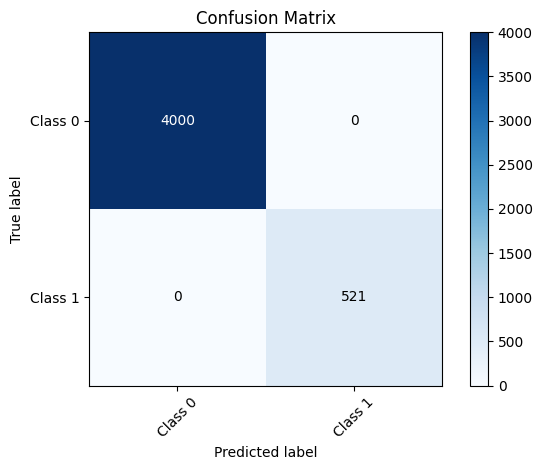

In [73]:
classes = ["Class 0", "Class 1"]
plot_confusion_matrix(conf_mat, classes)
plt.show()

Mô hình Random Forest có hiệu suất rất cao trên lớp dương, với 521 mẫu được dự đoán đúng và không có mẫu nào bị dự đoán sai thành lớp dương (False Negative - FN).
Mô hình này đạt được độ chính xác cao với tỉ lệ đúng trên cả hai lớp.

Confusion Matrix của mô hình Logistic Regression

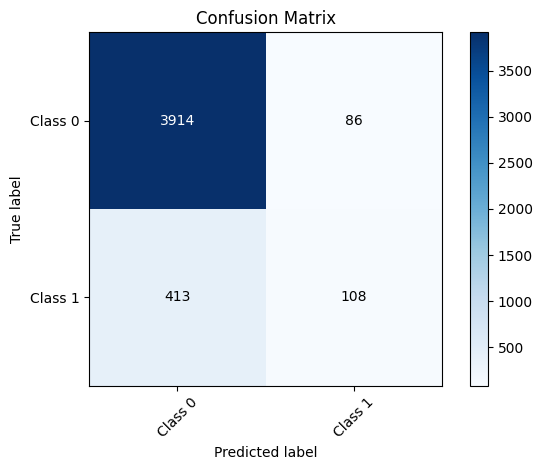

In [86]:
classes = ["Class 0", "Class 1"]
plot_confusion_matrix(conf_mat_lr, classes)
plt.show()

Mô hình Logistic Regression có sự phân bố khác biệt hơn giữa các ô trong confusion matrix. </br>
Mặc dù có nhiều True Negatives (3914) và True Positives (108), nhưng cũng có một số lớn False Positives (86) và False Negatives (413). </br>
Ở Class 1, mô hình dự đoán sai nhiều gấp gần 4 lần lượt dự đoán đúng (413 và 108). Từ đó có thể thấy rằng mô hình dự đoán không tốt ở nhãn 1. Lý do có thể là do việc mất cân bằng nhãn biến target trong bộ dữ liệu train.

Nhận xét:

* Mô hình Random Forest đạt được hiệu suất tốt hơn trên cả hai lớp, đặc biệt là trên lớp dương.
* Mô hình Logistic Regression có sự mất cân bằng giữa việc dự đoán nhãn 0 và 1, khi nhãn 1 bị dự đoán tệ hơn rất nhiều.

### Các thang đo đánh giá

Các thông số đánh giá của mô hình Random Forest

In [78]:
# Biến đổi dữ liệu thành dạng DataFrame
report = pd.DataFrame(report)
report.columns = ["","0", "1"]
report

,,0,1
0,precision,1.0,1.0
1,recall,1.0,1.0
2,f1_score,1.0,1.0


Các thông số đánh giá của mô hình Logistic Regression

In [79]:
# Biến đổi dữ liệu thành dạng DataFrame
report_lr = pd.DataFrame(report_lr)
report_lr.columns = ["","0", "1"]
report_lr

,,0,1
0,precision,0.9045528079500809,0.5567010309278351
1,recall,0.9785,0.2072936660268714
2,f1_score,0.9400744565870062,0.30209790209790216


Dựa vào các kết quả đánh giá precision, recall, và f1-score của hai mô hình Random Forest và Logistic Regression, ta có thể nhận xét như sau:

1. **Random Forest:**
   - Precision: 1.0 cho cả hai lớp, đồng nghĩa với việc mô hình không có False Positives.
   - Recall: 1.0 cho cả hai lớp, có nghĩa là mô hình đảm bảo bắt capture tất cả các trường hợp thực sự là class 0 và class 1.
   - F1-score: 1.0 cho cả hai lớp, là sự kết hợp giữa precision và recall, cho thấy hiệu suất tốt trên cả hai mặt.

2. **Logistic Regression:**
   - Precision: 0.9045 cho class 0 và 0.5567 cho class 1. Mô hình Logistic Regression có số lượng False Positives khá cao cho class 1, giảm độ chính xác của nó trong việc dự đoán class 1.
   - Recall: 0.9785 cho class 0 và 0.2073 cho class 1. Recall cho class 1 thấp, đồng nghĩa với việc mô hình không bắt capture một số lượng lớn các trường hợp thực sự là class 1.
   - F1-score: 0.9401 cho class 0 và 0.3021 cho class 1. F1-score cũng phản ánh sự kết hợp giữa precision và recall, và mô hình này có hiệu suất tốt hơn trên class 0.

**Nhận xét:**
   - Mô hình Random Forest đạt được hiệu suất tốt và đồng đều trên cả hai lớp, có precision, recall, và f1-score đều bằng 1.0.
   - Mô hình Logistic Regression có hiệu suất tốt trên class 0 nhưng có vấn đề với class 1, nơi mà precision và recall đều thấp hơn. Điều này có thể là do mô hình Logistic Regression được đào tạo trên dữ liệu mất cân bằng hoặc cần được điều chỉnh thêm.